# Extreme Gradient Boosting with XGBOOST - Course_Notes
## Notes by César Muro  


Recall supervised learning relies on label data. It can be divided in classification or regression.  
In classification supervised learning:  
* Outcome can be binary or multiclass  
* An important metric in classifcation is the AUC or Area Under Receiver Operating Characteristic is most versatile and common evaluation metric used to judge the quality of a binary classification model.
* In multiclass problems it is common to used the accuracy score
$$ accuracy=\frac{tp+tn}{tp+tn+fp+fn} $$  
and to look at the overall confusion matrix to evaluate the quality of a model.  

* In some supervised algorithms it is essential the numeric features to be scaled
* Categorical features should be encoded (one-hot)

### Introducing XGBoost  
The hottest machine learning library: XGBoost  
* Optimized gradient-boosting machine learning library
* Has APIs in several languages: Python, R, Julia, Scala...  
* Speed and performance
* Core algorithm is parallelizable trough GPUs
* Consistenly outperforms single-algorithm methods
* State-of-the-art performance in many ML tasks  


In Python:  
import xgboost as xgb  
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
...  
xg_cl=xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)  
xg_cl.fit(X_train,y_train)  
preds=xg_cl.predict(X_test)  
accuracy=float(np.sum(preds==y_test))/y_test.shape[0]  

XGBoost: Fit/Predict

It's time to create your first XGBoost model! As Sergey showed you in the video, you can use the scikit-learn .fit() / .predict() paradigm that you are already familiar to build your XGBoost models, as the xgboost library has a scikit-learn compatible API!

Here, you'll be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called churn_data - explore it in the Shell!

Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small xgboost model on the training set, and evaluate its performance on the test set by computing its accuracy.

In [1]:
# Import any packages you want to use here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url_1="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/churn_data.csv"
url_2="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/ames_housing_trimmed_processed.csv"
url_3="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/train.csv"
url_4="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/test.csv"
churn_data=pd.read_csv(url_1)
df=pd.read_csv(url_2)
df_complete_train=pd.read_csv(url_3)
df_complete_test=pd.read_csv(url_4)

In [2]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  bool   
 7   city_Carthag                 50000 non-null  int64  
 8   city_Harko                   50000 non-null  int64  
 9   phone_iPhone                 50000 non-null  int64  
 10  first_month_cat_more_1_trip  50000 non-null  int64  
 11  first_month_cat_no_trips     50000 non-null  int64  
 12  month_5_still_here           50000 non-null  int64  
dtypes: bool(1), floa

In [2]:
# Import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.758200


**Train decisions**  
XGBoost itself is an ensemble learner  
* Base learner - individual algorighm in an ensemble algorithm 
* A decision tree is a learning method that involves a tree-like graph to model either a continuous or categorical. It is composed of binary questions. 
  
Decision trees and CART (Classification and regression trees)    
* Constructed iteratively (one decision at a time)  
    * Until a stopping criterion is met
    * They are low bias high bariance models

CART: Classification and regression trees
* Each leaf always contains a real-valued score
* Can be later be converted into categories


In [10]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
X, y = data.data, data.target
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
import pandas as pd
cancer_data=pd.DataFrame(data=data.data,columns=cancer.feature_names)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Decision trees  
  
Make a simple decision tree using scikit-learn's DecisionTreeClassifier on the breast cancer dataset that comes pre-loaded with scikit-learn. Split the complete dataset into training and testing sets, and then train a DecisionTreeClassifier. You'll specify a parameter called max_depth.   

In [20]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4 = dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9736842105263158


### Boosting overview
* It is not a specific machine learning algorithm
* Concept that can be applied to a set of machine learning
   - "Meta-algorithm"  
* Ensemble meta-algorithm used to convert many weak learners into strong learner
  
**Weak learnerd and strong learners**
* Weak learner: ML algorithm that is slightly better than chance
* Boosting converts a collection of weak learners into a strong learner  
* Strong learner: Any algorithm that can be tuned to achieve good performance
  
**How boosting accomplished**  
* Iteratively learning a set of weak models on subsets of data
* Weighing each prediction according to each weak learner's performance
* Combine the weighted predictions to obtain a single weighted prediciton
* ... that is much better than the individual predictions themselves!  
  
**Model evaluation through cross-validation**  
* Cross validation: robust method for estimating the performance of a model on unseen data
* Generates many non-overlapping train/test splits on training data
* Reports the average test set performance across all data splits  

import xgboost as sgb  
import pandas as pd  
data_dmatrix=xgbDMatrix(data=data.iloc[:,:-1],label=)    
params={"objective":"binary:logistic","max_depth":4}  
cv_results=sgb.cv(dtrain=data,params=params,nfold=4,num_boost_round=10, metrics="error",as_pandas=True)  
print("Accuracy: %f"%((1-cv_results["test-error-mean"]).iloc[-1]))  

Measuring accuracy

You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. As Sergey discussed in the previous video, XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a DMatrix.

In [3]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001844          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.751480015401492


cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where accuracy is 1-error. The final accuracy of around 75% is an improvement from earlier!

In [4]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002819
1        0.790864       0.006758       0.789156      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937
0.8261911413597645


**When should I use XGBoost?**  
* You have a large number of training samples  
    - Greater than 1000 training samples
    - The number of features > number of training samples    
* You have a mixture of categorical and numeric features  
    - Or just numeric feature
  
When to NOT use XGBoost?  
- Image recognition 
- Computer vision
- Natural language processing  
- When the number of training samples is significantly smaller than the number of features

## Regression with XGBoost  
 In regression we use metrics as the Root mean squared error (RMSE), and Mean absolute error (MAE) to evaluate quality of a regression model. Common regression algorithms are linear regression and decision trees.  
   
**Objective (loss) functions and base learners**  
We know that the loss function
* Quantifies how far off a prediction is from actual result
* Measures the difference between estimated and true values for some collection of data
* Goal: Find the model that yields a minimum value of the loss function
* Loss function names in xgboost:  
    - reg:linear, use for regression problems
    - reg:logistics , use for classification problems when you want just decision, not probability
    - binary:logistic , use when you probability rather than just decision.   


**Base learners and why we need them**  
* XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
* Individual models= base learners
* Want base learnes that when combined create final prediction that is non-linear
* Each base learner should  be good at distinguishing or predicting different parts of the dataset
* Two kinds base learnes: tree and linear

**Trees as base learners example**  
import xgboost as xgb  
...  
xg_reg=xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)  
xg_reg.fit(X_train,y_train)    
preds=xg_reg.predict(X_test)   
rmse=np.sqrt(mean_squared_error(preds,y_test))  
  
 **Linear base learners example**  
 import xgboost as xgb  
 ...  
 DM_train=xgb.DMatrix(data=X_train,label=y_train)  
 DM_test=xgb.DMatrix(data=X_test,label=y_test)  
 params={"booster":"gblinear","objective":"reg:linear"}  
 xg_reg=xgb.train(params=params,dtrain=DM_train,num_boost_round=10)  
 rmse=np.sqrt(mean_squared_error(preds,y_test))  


Decision trees as base learners

It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called df.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotFrontage           1460 non-null   float64
 2   LotArea               1460 non-null   int64  
 3   OverallQual           1460 non-null   int64  
 4   OverallCond           1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   Remodeled             1460 non-null   int64  
 7   GrLivArea             1460 non-null   int64  
 8   BsmtFullBath          1460 non-null   int64  
 9   BsmtHalfBath          1460 non-null   int64  
 10  FullBath              1460 non-null   int64  
 11  HalfBath              1460 non-null   int64  
 12  BedroomAbvGr          1460 non-null   int64  
 13  Fireplaces            1460 non-null   int64  
 14  GarageArea            1460 non-null   int64  
 15  MSZoning_FV          

In [7]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear",booster="gbtree",n_estimators=10,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

[19:50:32] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 28106.463641


Linear base learners

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train()

In [13]:
import xgboost as xgb
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[20:32:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 45012.392917


Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. 

In [14]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[20:37:44] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:44] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:44] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:44] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136
4    51348.279619
Name: test-rmse-mean, dtype: float64


In [15]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

[20:42:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:42:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:42:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:42:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311
4    35670.647207
Name: test-mae-mean, dtype: float64


**Regularization and base learners in XGBoost**  
* Regularization is a control on model complexity
* Want models that are both accurate and as simple as possible
* Regularization parameters in XGBoost: 
     - gamma: minimum loss reduction allowed for a split to occur
     - alpha: l1, regularization on leaf weights, larger values mean more regularization
     - lambda: l2, regularization on leaf weights, it is a much smoother penalty than l1  

**Base learners in XGBoost**  
* Linear base learner: 
  - Sum of linear terms  
  - Boosted model is weighted sum of linear models (thus is itself linear)  
  - Rarely used 
* Tree base learner:
  - Decision tree
  - Boosted model is weighted sum of decision trees (non linear)  

In [2]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
import xgboost as xgb
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


Visualizing individual XGBoost trees

Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

[02:16:17] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


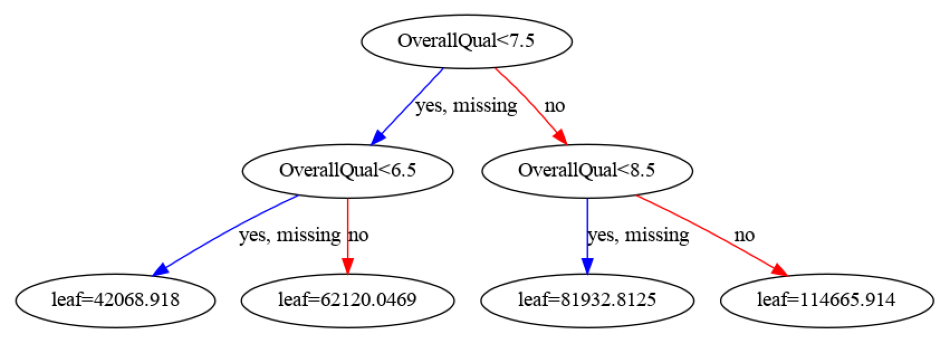

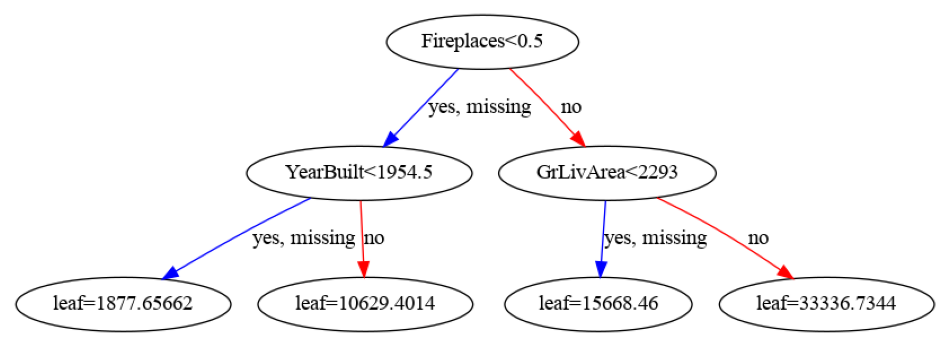

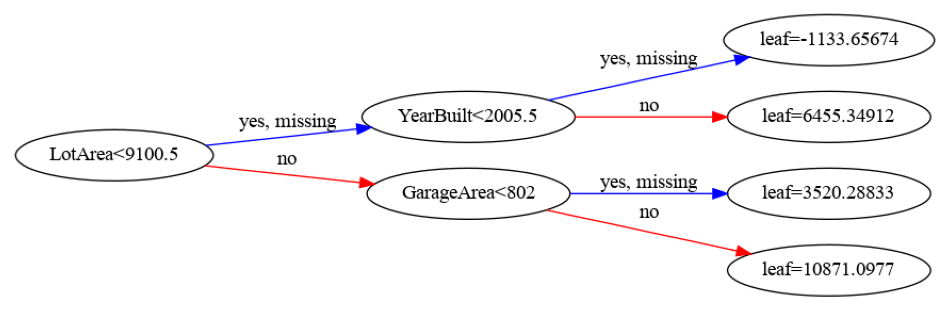

In [5]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_tree(xg_reg,num_trees=0,ax=ax)
plt.show()

# Plot the fifth tree
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_tree(xg_reg,num_trees=4,ax=ax)
plt.show()

# Plot the last tree sideways
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_tree(xg_reg, rankdir="LR", num_trees=9,ax=ax)
plt.show()

Excellent! Have a look at each of the plots. They provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. This allows us to identify which features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.

**Visualizing feature importances: What features are most important in my dataset**

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this

[02:35:09] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


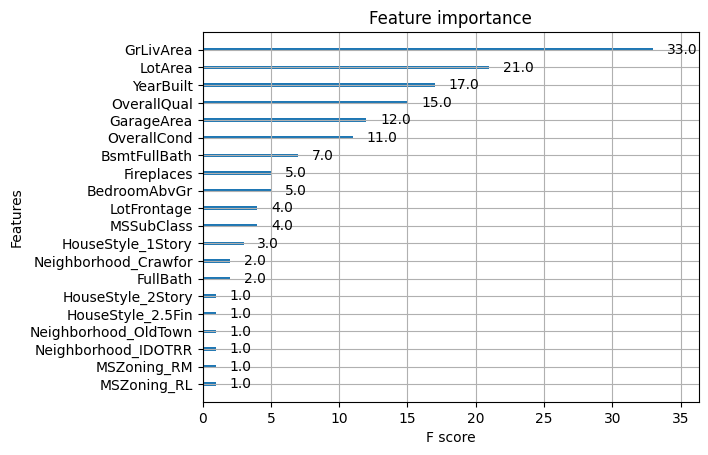

In [6]:
# Create the DMatrix: housing_dmatrix
X, y = df.iloc[:,:-1], df.iloc[:,-1]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params,num_boost_round=10,dtrain=housing_dmatrix)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## Fine-tuning your XGBoost model  
Tuned model example  
import xgboost as xgb  
params={"objective":"reg:linear","colsample_bytree":0.3,'learning_rate':0.1,'max_depth':5}    
tuned_cv_results=xgb.cv(dtrain=,num_boost_round=200,metrics="rmse",as_pandas=True,seed=123)  
print("Tuned rmse:f"%((tuned_cv_results["test-rmse-mean"]).tail(1)))  

Tuning the number of boosting rounds

Let's see how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.

In [2]:
import xgboost as xgb
import pandas as pd
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:07] WARNING: ../src/objective/regression_

**Automated boosting round selection using early_stopping**

Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.

In [4]:
import xgboost as xgb
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

[03:45:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635216      403.633062   142640.653507     705.559723
1     103057.033818       73.768079   104907.664683     111.117033
2      75975.967655      253.727043    79262.056654     563.766693
3      57420.530642      521.658273    61620.137859    1087.693428
4      44552.956483      544.170426    50437.560906    1846.446643
5      35763.948865      681.796675    43035.659539    2034.471115
6      29861.464164      769.571418    38600.880800    2169.796804
7      25994.675122      756.520639    36071.817710    2109.795408
8      23306.836299      759.237848    3

**Overview of XGBoost's hyperparameters**  
Common tree tunable parameters:
* learning rate: learning rate/eta. How quickly the model fits the residual error.  
* gamma: min loss reduction to create new split.  
* lambda: l2 reg on leaf weights.  
* alpha: l1 reg on leaf weights.  
* max_depth: max depth per tree.  
* subsample: % sample used per tree.  
* colsample_bytree: % feature used per tree.  

Linear tunable parameters:
* lambda: l2 reg on weights.  
* alpha: l1 reg on weights.  
* lambda_bias: l2 reg term on bias.  
  
You can also tune the number of estimators used for both base model types!  

Tuning eta

It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the "eta", also known as the learning rate.

The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [3]:
# Create your housing DMatrix: housing_dmatrix
import xgboost as xgb
X, y = df.iloc[:,:-1], df.iloc[:,-1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix,nfold=3,params=params,early_stopping_rounds=5,num_boost_round=10,metrics="rmse",seed=123, as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:25] WARNING: ../src/objective/regression_

Tuning max_depth

In this exercise, your job is to tune max_depth, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

In [3]:
import xgboost as xgb
X, y =df.iloc[:,:-1], df.iloc[:,-1]
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=2,early_stopping_rounds=5,num_boost_round=10,metrics='rmse',seed=123,as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   max_depth     best_rmse
0          2  37957.4

Tuning colsample_bytree

Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [4]:
# Create your housing DMatrix
X,y=df.iloc[:,:-1], df.iloc[:,-1]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   colsample_bytree     best_rmse
0             

**Review of grid search and random search**  
They are strategies for choosing several hyperparameter values simultaneously.  
  
* Grid search: Search exhaustively over a given set of hyperparameters once per set hyperparameters.  
* Number of models=number of distinct values per hyperparameters multiplied across each hyperparameters.  
* Pick final model hyperparameter valies that give best cross-validated evaluation metric.  

import pandas as pd  
import xgboost as xgb  
import numpy as np  
from sklearn.model_selection import GridSearchCV   
...  
housing_dmatrix=xgb.Dmatrix(data=X,label=y)  
gbm_param_grid={'learning_rate':[0.01,0.1,0.5,0.9], 'n_estimators':[200], 'subsample':[0.3,0.5,0.9]}  
gbm=xgb.XGBRegressor()  
grid_mse=GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)  
grid_mse.fit(X,y)  
print("Best parameters found":,grid_mse.best_params_)  
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

* Random search: It creates a range of hyperparamter values per hyperparameter that you would like to search over.
* Set the number of iterations you would like for the random search to continue
* During each iteration, randomly draw a value in the range of specified values for each hyperparameter searched over and train/evaluate a model with those hyperparameters
* After you reach the maximum number of iterations, select the hyperparameter configuration with the best evaluated score

import pandas as pd  
import xgboost as xgb  
import numpy as np  
from sklearn.model_selection import RandomizedSearchCV   
...  
housing_dmatrix=xgb.Dmatrix(data=X,label=y)  
gbm_param_grid={'learning_rate':np.arange(0.05,1.05,0.05), 'n_estimators':[200], 'subsample':np.arange(0.05,1.05,0.05)}  
gbm=xgb.XGBRegressor()  
randomized_mse=RandomizedSearchCV(estimator=gbm,param_grid=gbm_param_grid,n_iter=25,scoring='neg_mean_squared_error',cv=4,verbose=1)  
randomized_mse.fit(X,y)  
print("Best parameters found":,randomized_mse.best_params_)  
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Grid search with XGBoost

Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with GridSearchCV!

In [5]:
import xgboost
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd  
X,y=df.iloc[:,:-1], df.iloc[:,-1]
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3,0.7],
    'n_estimators': [50],
    'max_depth': [2,5]
}

gbm=xgb.XGBRegressor()
# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  29916.017850830365


Random search with XGBoost

Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead, as you will do in this exercise. The good news is you only have to make a few modifications to your GridSearchCV code to do RandomizedSearchCV. The key difference is you have to specify a param_distributions parameter instead of a param_grid parameter.

In [7]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd  
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': np.arange(2,12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid,n_iter=5,cv=4,scoring='neg_mean_squared_error',verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


**Limits of grid search and random search limitations**  
* Grid Search: Number of models you must build with every additional new parameter grows very quickly
* Random Search: Parameter space to explore can massive. Randomly jumping throughout for a 'best' result becomes a waiting game

### Using XGBoost in pipelines  

**Review of pipelines using sklearn**  
Pipelines are objects that take a list of named tuples as input. The named tuples always contain a string name as the first element in each tuple.  
* Takes a list of named 2-tuples (name, pipeline_step) as input   
* Tuples can contain any arbitrary scikit-learn compatible estimator or transformer object
* Pipeline implements fit/predict methods
* Can be used as input estimator into grid/randomized search and cross_val_score methods.  

impor pandas as pd  
from sklear.ensemble import RandomForestRegressor  
import numpy as np  
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline  
from sklear.model_selection import cross_val_score  
...  
rf_pipeline=Pipeline[("st_scaler",StandardScaler()),("rf_model",RandomForestRegressor())]  
scores=cross_val_score(rf_pipeline,X,y,scoring='neg_mean_squared_error',cv=10)  
final_avg_rmse=np.mean(np.sqrt(np.abs(scores)))  
print("Final RMSE:", final_avg_rmse)  

**Preprocessing I: LabelEncoder and OneHotEncoder**  
* LabelEncoder: Converts a categorical column of strings into integers
* OneHotEncoder: Takes the column of integers and encodes them as dummy variables. 
* Cannot be done within a pipeline  
  
**Preprocessing II: DictVectorizer**  
It is a class found in scikit-learn's feature extraction submodule
* Traditionally used in text processing  
* Converts list of feature mapping into vectors
* Need to convert DataFrame into a list of dictionary entries  

In [14]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df=df_complete_train[['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces', 'GarageArea', 'MSZoning', 'PavedDrive', 'Neighborhood','BldgType', 'HouseStyle','SalePrice']]

Encoding categorical columns I: LabelEncoder

Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step.

First, you will need to fill in missing values - as you saw previously, the column LotFrontage has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch this video from Supervised Learning with scikit-learn for a refresher on the idea.

The data has five categorical columns: MSZoning, PavedDrive, Neighborhood, BldgType, and HouseStyle. Scikit-learn has a LabelEncoder function that converts the values in each categorical column into integers. You'll practice using this here.

In [3]:

# Fill missing values with 0
for col in list(df.dtypes[df.dtypes=='int64'].index):
    df[col]=df[col].astype(float)
for col in list(df.dtypes[df.dtypes=='float64'].index):
    df[col]=df[col].fillna(0)

In [5]:
from sklearn.preprocessing import LabelEncoder 

# Get list of categorical column names
categorical_columns=list(df.dtypes[df.dtypes=='object'].index)

#Print the head of the categorical columns
df[categorical_columns].head()

#Create the label encoder object  
le=LabelEncoder()

#Apply label encoder to categorical data
df[categorical_columns]=df[categorical_columns].apply(lambda x: le.fit_transform(x))

#Prin the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

   MSZoning  PavedDrive  Neighborhood  BldgType  HouseStyle
0         3           2             5         0           5
1         3           2            24         0           2
2         3           2             5         0           5
3         3           2             6         0           5
4         3           2            15         0           5


Encoding categorical columns II: OneHotEncoder

Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's OneHotEncoder.

In [6]:
# Import One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder
ohe=OneHotEncoder(sparse=False)

# Apply OneHotEncoder to categorical columns . output is no longer a dataframe
df_encoded=ohe.fit_transform(df)

# Print the first 5 rows of the data set  
print(df_encoded[:5,:])

#Print the shape
print(df.shape)  

# Print the shape of the transformed array
print(df_encoded.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1460, 20)
(1460, 3367)


Encoding categorical columns III: DictVectorizer

Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

In [7]:
df=df_complete_train[['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces', 'GarageArea', 'MSZoning', 'PavedDrive', 'Neighborhood','BldgType', 'HouseStyle','SalePrice']]

In [8]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer  

# Convert df into a dictionary
df_dict=df.to_dict('records')

# Create the DictVectorizer object
dv=DictVectorizer(sparse=False)

# Apply dv on df: df_encoded 
df_encoded=dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])  

#Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00

Preprocessing within a pipeline

Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct DictVectorizer approach and put it alongside an XGBoostRegressor inside of a scikit-learn pipeline.

In [13]:
X=df_complete_train[['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces', 'GarageArea', 'MSZoning', 'PavedDrive', 'Neighborhood','BldgType', 'HouseStyle']]
y=df_complete_train['SalePrice']
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)


# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the Pipeline. Don't forget to convert X into a format that DictVectorizer understands by calling the to_dict("records") method on X.
scores=cross_val_score(xgb_pipeline,X.to_dict("records"),y,scoring='neg_mean_squared_error',cv=10)
final_avg_rmse=np.mean(np.sqrt(np.abs(scores)))
print('Final XGB RMSE:',final_avg_rmse)

Final XGB RMSE: 28004.497306089754


In [17]:
print(np.sqrt(np.abs(np.min(scores))))

34861.12915726589


**Incorporating XGBoost into pipelines**  
* sklearn_pandas: 
      * DataFrameMapper, interoperability between pandas and scikit-learn
* sklearn.impute:
      * SimpleImputer, Native imputation of numerical and categorical columns in scikit-learn 
* sklearn.pipeline:
       * FeatureUnion, combine multiple pipelines of features into a single pipeline of features.

Kidney disease case study I: Categorical Imputer

You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

As Sergey mentioned in the video, you'll be introduced to a new library, sklearn_pandas, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to use the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

We've also created a transformer called a Dictifier that encapsulates converting a DataFrame using .to_dict("records") without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of feature names in kidney_feature_names, the target name in kidney_target_name, the features in X, and the target in y.

In this exercise, your task is to apply sklearn's SimpleImputer to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments input_df=True and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

In [30]:
import pandas as pd
X=pd.read_csv("https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/chronic_kidney_X.csv")
y=pd.read_csv("https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/chronic_kidney_y.csv")

In [35]:
X=X.drop('rbc',axis=1)

In [8]:
!pip install xgboost

In [36]:
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature columns
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
    [([numeric_feature], SimpleImputer(strategy='median')) 
     for numeric_feature in non_categorical_columns],
    input_df=True,
    df_out=True
)

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
    [(category_feature, SimpleImputer(missing_values='NaN',strategy='most_frequent')) 
     for category_feature in categorical_columns],
    input_df=True,
    df_out=True
)


age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


Kidney disease case study II - Feature Union

Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

Just like with pipelines, you have to pass it a list of (string, transformer) tuples, where the first half of each tuple is the name of the transformer.

In [37]:
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
    ("num_mapper", numeric_imputation_mapper),
    ("cat_mapper", categorical_imputation_mapper)
])

Kidney disease case study III - Full pipeline

It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

After creating the pipeline, your task is to cross-validate it to see how well it performs.

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [40]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer



pipeline = Pipeline([
    ("featureunion", numeric_categorical_union),
    ("dictifier", Dictifier()),
    ("vectorizer", DictVectorizer(sort=False)),
    ("clf", xgb.XGBClassifier(max_depth=3))
])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  nan


c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\cmuro\anaconda3\

Bringing it all together

Alright, it's time to bring together everything you've learned so far! In this final exercise of the course, you will combine your work from the previous exercises into one end-to-end XGBoost pipeline to really cement your understanding of preprocessing and pipelines in XGBoost.

Your work from the previous 3 exercises, where you preprocessed the data and set up your pipeline, has been pre-loaded. Your job is to perform a randomized search and identify the best hyperparameters.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=2, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print('Score: ', randomized_roc_auc.best_score_)
print('Estimator: ', randomized_roc_auc.best_estimator_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\cmuro\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\cmuro\anaconda3\

ValueError: pc: Expected 2D array, got 1D array instead:
array=['normal' 'normal' 'normal' 'abnormal' 'normal' nan 'normal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'normal' nan 'abnormal'
 'normal' 'normal' nan 'normal' 'abnormal' 'abnormal' nan 'abnormal'
 'normal' 'abnormal' 'normal' 'normal' 'abnormal' nan 'abnormal' nan
 'abnormal' 'normal' 'abnormal' nan 'normal' 'normal' nan 'normal' nan
 'abnormal' 'normal' 'normal' nan 'abnormal' 'abnormal' 'normal' 'normal'
 'normal' 'abnormal' nan 'normal' 'normal' nan nan 'normal' 'abnormal'
 'normal' 'abnormal' nan 'abnormal' 'abnormal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'abnormal' 'normal' 'normal' 'normal' 'normal'
 'abnormal' 'abnormal' 'abnormal' 'normal' 'abnormal' 'normal' nan
 'normal' 'normal' nan nan 'normal' 'abnormal' nan nan 'abnormal' 'normal'
 'normal' 'normal' 'normal' 'abnormal' 'abnormal' 'normal' 'normal'
 'normal' 'normal' nan 'abnormal' 'abnormal' 'abnormal' 'normal'
 'abnormal' nan 'normal' nan nan 'abnormal' nan 'normal' 'normal'
 'abnormal' 'normal' 'abnormal' 'abnormal' 'normal' nan 'normal' 'normal'
 'normal' nan nan 'abnormal' 'normal' nan 'normal' 'normal' 'abnormal'
 'normal' 'abnormal' 'normal' nan 'normal' nan 'normal' 'normal'
 'abnormal' nan 'abnormal' 'normal' 'normal' nan 'normal' 'normal'
 'abnormal' 'normal' 'abnormal' nan 'abnormal' 'normal' nan 'normal'
 'abnormal' 'abnormal' 'normal' 'normal' 'abnormal' 'normal' 'normal' nan
 nan nan 'normal' nan nan nan 'normal' 'normal' 'normal' 'normal' 'normal'
 nan 'normal' nan 'normal' 'abnormal' 'normal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'normal' 'normal' 'abnormal' 'normal' 'normal'
 'normal' nan 'abnormal' 'abnormal' 'normal' 'normal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' nan 'normal' 'normal' 'normal' nan nan
 nan 'normal' nan 'normal' 'normal' nan 'normal' 'normal' 'normal'
 'normal' 'abnormal' 'abnormal' 'abnormal' 'normal' 'normal' 'normal'
 'normal' 'normal' nan nan 'normal' 'normal' 'normal' 'abnormal' 'normal'
 nan 'abnormal' 'abnormal' nan 'abnormal' 'normal' 'normal' 'normal' nan
 'normal' nan 'normal' 'normal' 'abnormal' 'abnormal' 'normal' 'abnormal'
 nan 'normal' 'abnormal' 'abnormal' 'abnormal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' nan
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' nan 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' nan 'normal' 'normal'
 'normal' 'normal' nan 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 nan 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' nan 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 nan nan 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' nan
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Final Thoughts**

Advanced Topics:  
* Using XGBoost for ranking/recommandation problems (Netflix/Amazon problem)
* Using more sophisticated hyperparamter tuning strategies for tuning XGBoost model (Bayesian Optimization)
* Using XGBoost as part of an ensemble of other models for regression/classification
